In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams["font.family"]="Malgun Gothic"
plt.rcParams["font.size"]=12
plt.rcParams["figure.figsize"]=(14,4)

In [2]:
edu_eco=pd.read_csv('서울놈들사교육비.csv',sep='\t')
edu_eco
#그래프상 사교육 참여율은 10년간 변화가 없어서 데이터 날림

,기간,구분,학생 1인당 월평균 사교육비,학생 1인당 월평균 사교육비.1,학생 1인당 월평균 사교육비.2,학생 1인당 월평균 사교육비.3,학생 1인당 월평균 사교육비.4,사교육 참여율,사교육 참여율.1,사교육 참여율.2,사교육 참여율.3,사교육 참여율.4
0,기간,구분,평균,초등학교,중학교,고등학교,일반고,평균,초등학교,중학교,고등학교,일반고
1,2010,구분,32.1,29.6,30.9,37.2,42,77.5,88.8,72.2,64.9,70.6
2,2011,구분,32.8,30.4,31.8,37.4,42.7,77,87.7,73.4,64.2,71.2
3,2012,구분,31.2,26.1,34,36.1,41.1,73.5,82,72.7,61.8,68.2
4,2013,구분,32.8,28.4,34.9,37.1,42.7,75,84.8,74.7,61.6,68.4
5,2014,구분,33.5,30,34.9,37.1,42.1,74.4,84.3,73.3,61.3,67.4
6,2015,구분,33.8,29.6,35.5,38.3,43.6,74.3,82.9,74.1,61.8,68.2
7,2016,구분,35.2,29.9,37,41.7,47,73.7,84.2,69.9,61.5,66.7
8,2017,구분,39.1,34.1,41.7,44.5,51.8,77.6,86.5,76,65.5,72.6
9,2018,구분,41.1,36.5,41.5,48.4,56.6,79.9,89.5,74.8,68.3,74.9


In [3]:
edu_eco_drop=edu_eco.drop(['사교육 참여율','사교육 참여율.1',
                           '사교육 참여율.2','사교육 참여율.3','사교육 참여율.4','구분','학생 1인당 월평균 사교육비.4'],axis=1)
edu_eco_drop

,기간,학생 1인당 월평균 사교육비,학생 1인당 월평균 사교육비.1,학생 1인당 월평균 사교육비.2,학생 1인당 월평균 사교육비.3
0,기간,평균,초등학교,중학교,고등학교
1,2010,32.1,29.6,30.9,37.2
2,2011,32.8,30.4,31.8,37.4
3,2012,31.2,26.1,34,36.1
4,2013,32.8,28.4,34.9,37.1
5,2014,33.5,30,34.9,37.1
6,2015,33.8,29.6,35.5,38.3
7,2016,35.2,29.9,37,41.7
8,2017,39.1,34.1,41.7,44.5
9,2018,41.1,36.5,41.5,48.4


In [4]:
edu_eco_drop.columns=['기간','평균사교육비','초등사교육비','중등사교육비','고등사교육비']
edu_eco_drop

,기간,평균사교육비,초등사교육비,중등사교육비,고등사교육비
0,기간,평균,초등학교,중학교,고등학교
1,2010,32.1,29.6,30.9,37.2
2,2011,32.8,30.4,31.8,37.4
3,2012,31.2,26.1,34,36.1
4,2013,32.8,28.4,34.9,37.1
5,2014,33.5,30,34.9,37.1
6,2015,33.8,29.6,35.5,38.3
7,2016,35.2,29.9,37,41.7
8,2017,39.1,34.1,41.7,44.5
9,2018,41.1,36.5,41.5,48.4


In [5]:
edu_eco_drop_row=edu_eco_drop.drop(0)
edu_eco_drop_row

,기간,평균사교육비,초등사교육비,중등사교육비,고등사교육비
1,2010,32.1,29.6,30.9,37.2
2,2011,32.8,30.4,31.8,37.4
3,2012,31.2,26.1,34,36.1
4,2013,32.8,28.4,34.9,37.1
5,2014,33.5,30,34.9,37.1
6,2015,33.8,29.6,35.5,38.3
7,2016,35.2,29.9,37,41.7
8,2017,39.1,34.1,41.7,44.5
9,2018,41.1,36.5,41.5,48.4
10,2019,45.1,38.5,46.3,55.6


In [6]:
edu_eco_fix=pd.melt(edu_eco_drop_row,id_vars=['기간'],var_name='school',value_name='money')
edu_eco_fix

,기간,school,money
0,2010,평균사교육비,32.1
1,2011,평균사교육비,32.8
2,2012,평균사교육비,31.2
3,2013,평균사교육비,32.8
4,2014,평균사교육비,33.5
5,2015,평균사교육비,33.8
6,2016,평균사교육비,35.2
7,2017,평균사교육비,39.1
8,2018,평균사교육비,41.1
9,2019,평균사교육비,45.1


In [7]:
edu_eco_fix['M']=edu_eco_fix['money'].astype(float)
edu_eco_r=edu_eco_fix.drop(['money'],axis=1)

In [8]:
edu_eco_groupby=edu_eco_r.groupby(['기간','school']).M.mean()
edu_eco_groupby_rindex=edu_eco_groupby.reset_index()
edu_eco_groupby_rindex

,기간,school,M
0,2010,고등사교육비,37.2
1,2010,중등사교육비,30.9
2,2010,초등사교육비,29.6
3,2010,평균사교육비,32.1
4,2011,고등사교육비,37.4
5,2011,중등사교육비,31.8
6,2011,초등사교육비,30.4
7,2011,평균사교육비,32.8
8,2012,고등사교육비,36.1
9,2012,중등사교육비,34.0


In [9]:
def school(school):
    if school=='고등사교육비' : return 0
    if school=='중등사교육비' : return 1
    if school=='초등사교육비' : return 2
    if school=='평균사교육비' : return 3

In [10]:
edu_eco_groupby_rindex['school_color']=edu_eco_groupby_rindex['school'].apply(school)
edu_eco_groupby_rindex

,기간,school,M,school_color
0,2010,고등사교육비,37.2,0
1,2010,중등사교육비,30.9,1
2,2010,초등사교육비,29.6,2
3,2010,평균사교육비,32.1,3
4,2011,고등사교육비,37.4,0
5,2011,중등사교육비,31.8,1
6,2011,초등사교육비,30.4,2
7,2011,평균사교육비,32.8,3
8,2012,고등사교육비,36.1,0
9,2012,중등사교육비,34.0,1


In [11]:
edu_eco_groupby_rindex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   기간            40 non-null     object 
 1   school        40 non-null     object 
 2   M             40 non-null     float64
 3   school_color  40 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.4+ KB


In [12]:
edu_eco_groupby_rindex['기간(int)']=edu_eco_groupby_rindex['기간'].astype(int)
edu_eco_groupby_rindex

,기간,school,M,school_color,기간(int)
0,2010,고등사교육비,37.2,0,2010
1,2010,중등사교육비,30.9,1,2010
2,2010,초등사교육비,29.6,2,2010
3,2010,평균사교육비,32.1,3,2010
4,2011,고등사교육비,37.4,0,2011
5,2011,중등사교육비,31.8,1,2011
6,2011,초등사교육비,30.4,2,2011
7,2011,평균사교육비,32.8,3,2011
8,2012,고등사교육비,36.1,0,2012
9,2012,중등사교육비,34.0,1,2012


In [13]:
edu_eco_groupby_rindex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   기간            40 non-null     object 
 1   school        40 non-null     object 
 2   M             40 non-null     float64
 3   school_color  40 non-null     int64  
 4   기간(int)       40 non-null     int32  
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 1.5+ KB


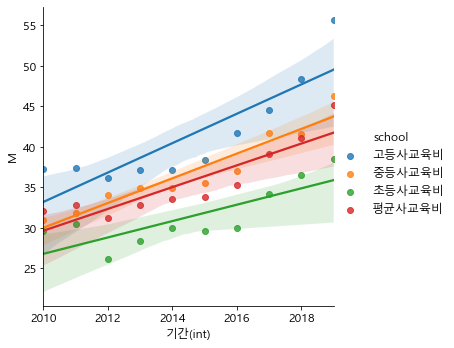

In [14]:
ax1=plt.subplots
ax1=sns.lmplot(x='기간(int)',y='M',data=edu_eco_groupby_rindex,hue='school',fit_reg=True)

Text(0.5, 1.0, '사교육비의 히스토그램')

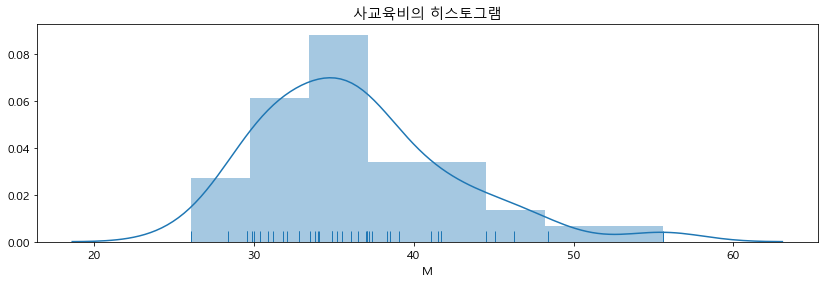

In [15]:
ax2=plt.subplots()
ax2=sns.distplot(edu_eco_groupby_rindex['M'],rug=True)
ax2.set_title('사교육비의 히스토그램')

In [31]:
edu_eco_groupby_rindex.to_csv('2차분석데이터\서울시사교육비정형화데이터.csv',sep='\t')